In [401]:
import numpy as np # linear algebra
import seaborn as sns
sns.set_palette("Set2")

import matplotlib.pyplot as plt
PW = 12
PH = 8
plt.rcParams['figure.figsize'] = (PW, PH) 
plt.rcParams['image.cmap'] = 'gray'

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

import datetime as dt
from ggplot import *

dir_path = "./Meteorological Data/" 
%matplotlib inline

import os
print(os.listdir(dir_path))

['Melbourne - 086071-Table 1.csv', 'Brisbane - 040913-Table 1.csv', 'Adelaide - 023090-Table 1.csv', 'Perth - 009225-Table 1.csv', 'Sydney - 066062-Table 1.csv']


In [373]:
files = ['Melbourne - 086071-Table 1.csv', 'Brisbane - 040913-Table 1.csv',
         'Adelaide - 023090-Table 1.csv', 'Perth - 009225-Table 1.csv', 'Sydney - 066062-Table 1.csv']

In [374]:
city = 0
df = pd.read_csv(dir_path + files[city], encoding="utf-8")
df["City"] = files[city].split(" ")[0]
df = df[-365:]
#print len(df)

for city in range(1, len(files)):
    
    tdf = pd.read_csv(dir_path + files[city], encoding="utf-8")
    tdf = tdf[-365:]
    #print(len(tdf))
    
    #Drop Unnamed Column
    if city in [1,2,4]:
        tdf.drop([tdf.columns[-1]], axis=1, inplace=True)
    
    tdf["City"] = files[city].split(" ")[0]
    df = pd.concat([df, tdf])
        

df["Quarter"] = df.Date.apply(lambda x: pd.Timestamp(x).quarter)
df["Season"] = df["Quarter"].apply(lambda x: "Summer" if x in[1,4] else "Winter")
df["Date"] = pd.to_datetime(df.Date)
df.set_index(pd.to_datetime(df.Date), inplace=True)
df.drop(["Day"], axis=1, inplace=True)

#New Columns
df["Daily Temperature Variation"] = df[u"Maximum temperature (°C)"] - df[u"Minimum temperature (°C)"]


print(df.columns)
df.head(3)

Index([                             u'Date',
                u'Minimum temperature (°C)',
                u'Maximum temperature (°C)',
                           u'Rainfall (mm)',
                        u'Evaporation (mm)',
                        u'Sunshine (hours)',
         u'Direction of maximum wind gust ',
       u'Speed of maximum wind gust (km/h)',
               u'Time of maximum wind gust',
                    u'9am Temperature (°C)',
               u'9am relative humidity (%)',
                u'9am cloud amount (oktas)',
                      u'9am wind direction',
                   u'9am wind speed (km/h)',
                  u'9am MSL pressure (hPa)',
                    u'3pm Temperature (°C)',
               u'3pm relative humidity (%)',
                u'3pm cloud amount (oktas)',
                      u'3pm wind direction',
                   u'3pm wind speed (km/h)',
                  u'3pm MSL pressure (hPa)',
                                    u'City',
          

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),City,Quarter,Season,Daily Temperature Variation
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-12,2014-01-12,21.1,29.3,0.4,13.2,8.9,N,76.0,2:40,25.6,51.0,7.0,NNW,30.0,1004.9,26.9,51.0,3.0,SE,20.0,1003.6,Melbourne,1,Summer,8.2
2014-02-12,2014-02-12,16.7,26.1,0.2,7.6,11.2,SSE,41.0,14:40,19.1,69.0,6.0,Calm,NaN,1010.0,23.2,50.0,3.0,SSW,15.0,1009.2,Melbourne,1,Summer,9.4
2014-03-12,2014-03-12,16.5,23.9,0.0,7.0,1.4,WSW,43.0,20:45,18.3,79.0,8.0,NW,7.0,1013.6,19.5,79.0,8.0,WNW,4.0,1012.9,Melbourne,1,Summer,7.4


In [375]:
#df.info()

In [376]:
def plot_dists(df, p):
    nrows = 2
    ncols = int(np.ceil(len(p) / float(nrows)))
    f, ax = plt.subplots(ncols, nrows, figsize=(nrows*PW,ncols*PH))
    ind = 0
    for col in p:
        if df[col].dtype == object:
            #continue
            topl =  df[df[col].notnull()][col].value_counts()
            sns.barplot(x=np.array(topl.index), y= np.array(topl.values), ax=ax[int(ind/nrows),ind%nrows])
            ax[int(ind/nrows),ind%nrows].set_xlabel(col)
            ind += 1
        elif df[col].dtype != "datetime64[ns]":
            topl = df[df[col].notnull()][col]
            if len(topl) > 0:
                # , hue="Season"
                sns.violinplot(x="City", y=col, hue="Season" ,split=True, data=df, ax=ax[int(ind/nrows),ind%nrows],palette="Set2")
                ind += 1
        else:
            continue

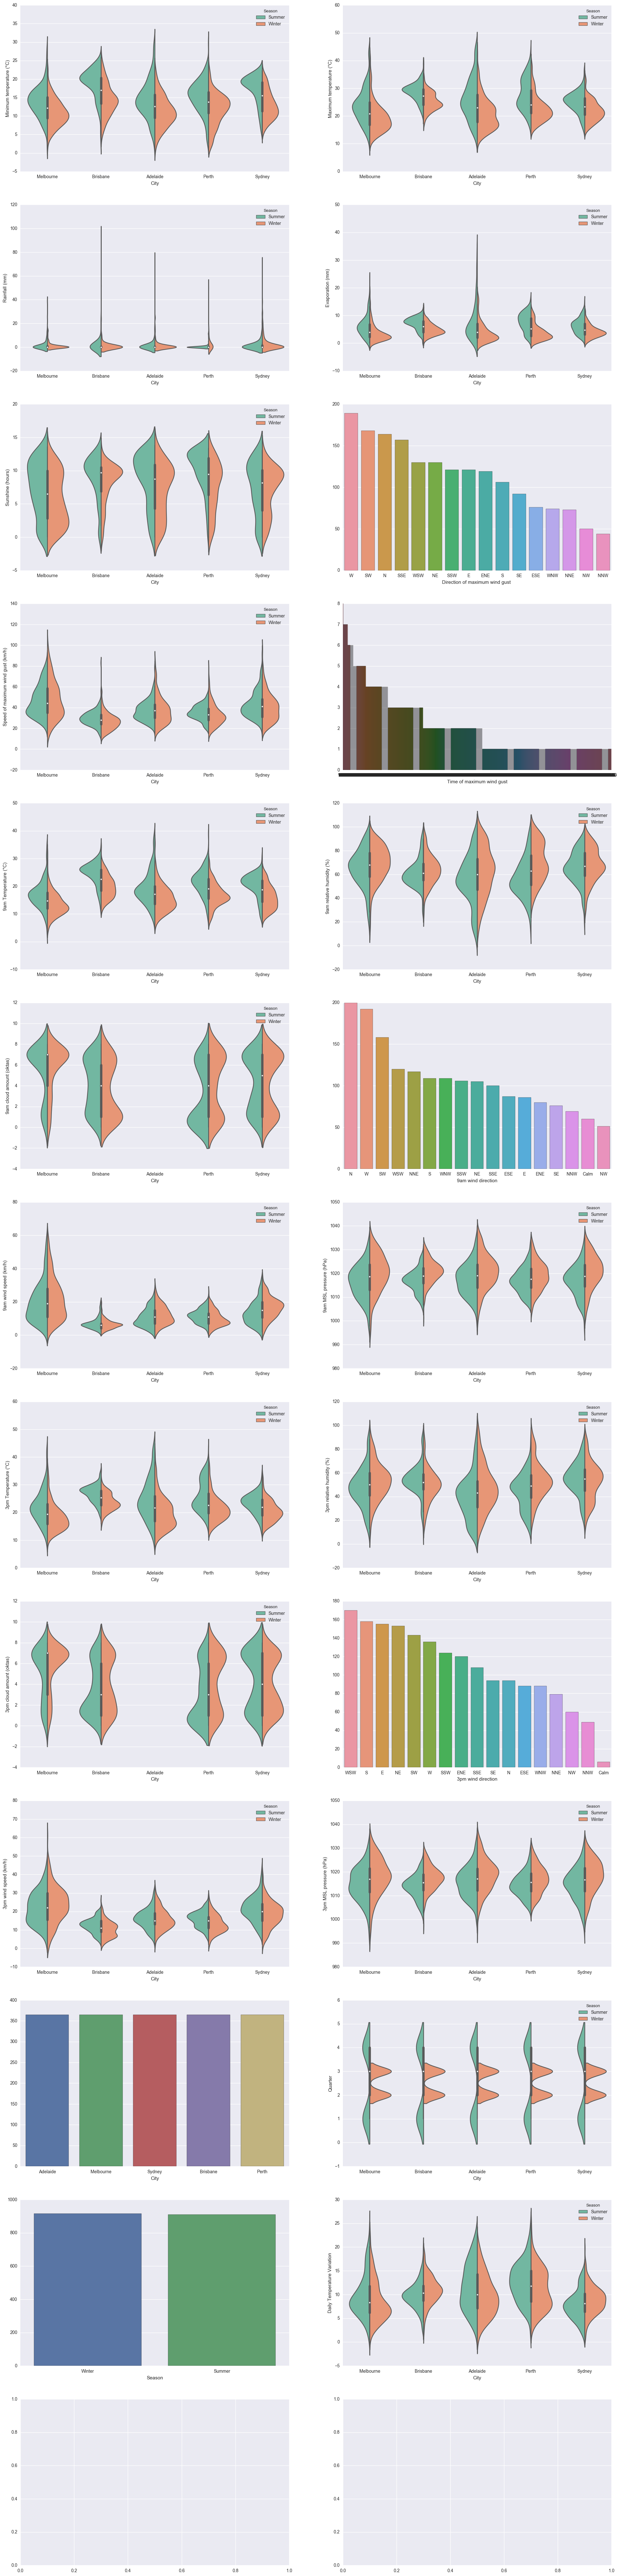

In [377]:
plot_dists(df, df.columns)

##  Fill NaNs

In [378]:
#IsNan Cols#IsNan C 
p = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
p = p[p > 0]
p

3pm cloud amount (oktas)             0.295342
9am cloud amount (oktas)             0.276712
Evaporation (mm)                     0.065753
Rainfall (mm)                        0.050411
9am wind speed (km/h)                0.032877
Speed of maximum wind gust (km/h)    0.006027
Direction of maximum wind gust       0.006027
Sunshine (hours)                     0.006027
Time of maximum wind gust            0.004384
3pm wind speed (km/h)                0.003288
3pm relative humidity (%)            0.002192
3pm Temperature (°C)                 0.001644
9am relative humidity (%)            0.001096
9am Temperature (°C)                 0.001096
Daily Temperature Variation          0.001096
9am MSL pressure (hPa)               0.000548
Maximum temperature (°C)             0.000548
Minimum temperature (°C)             0.000548
dtype: float64

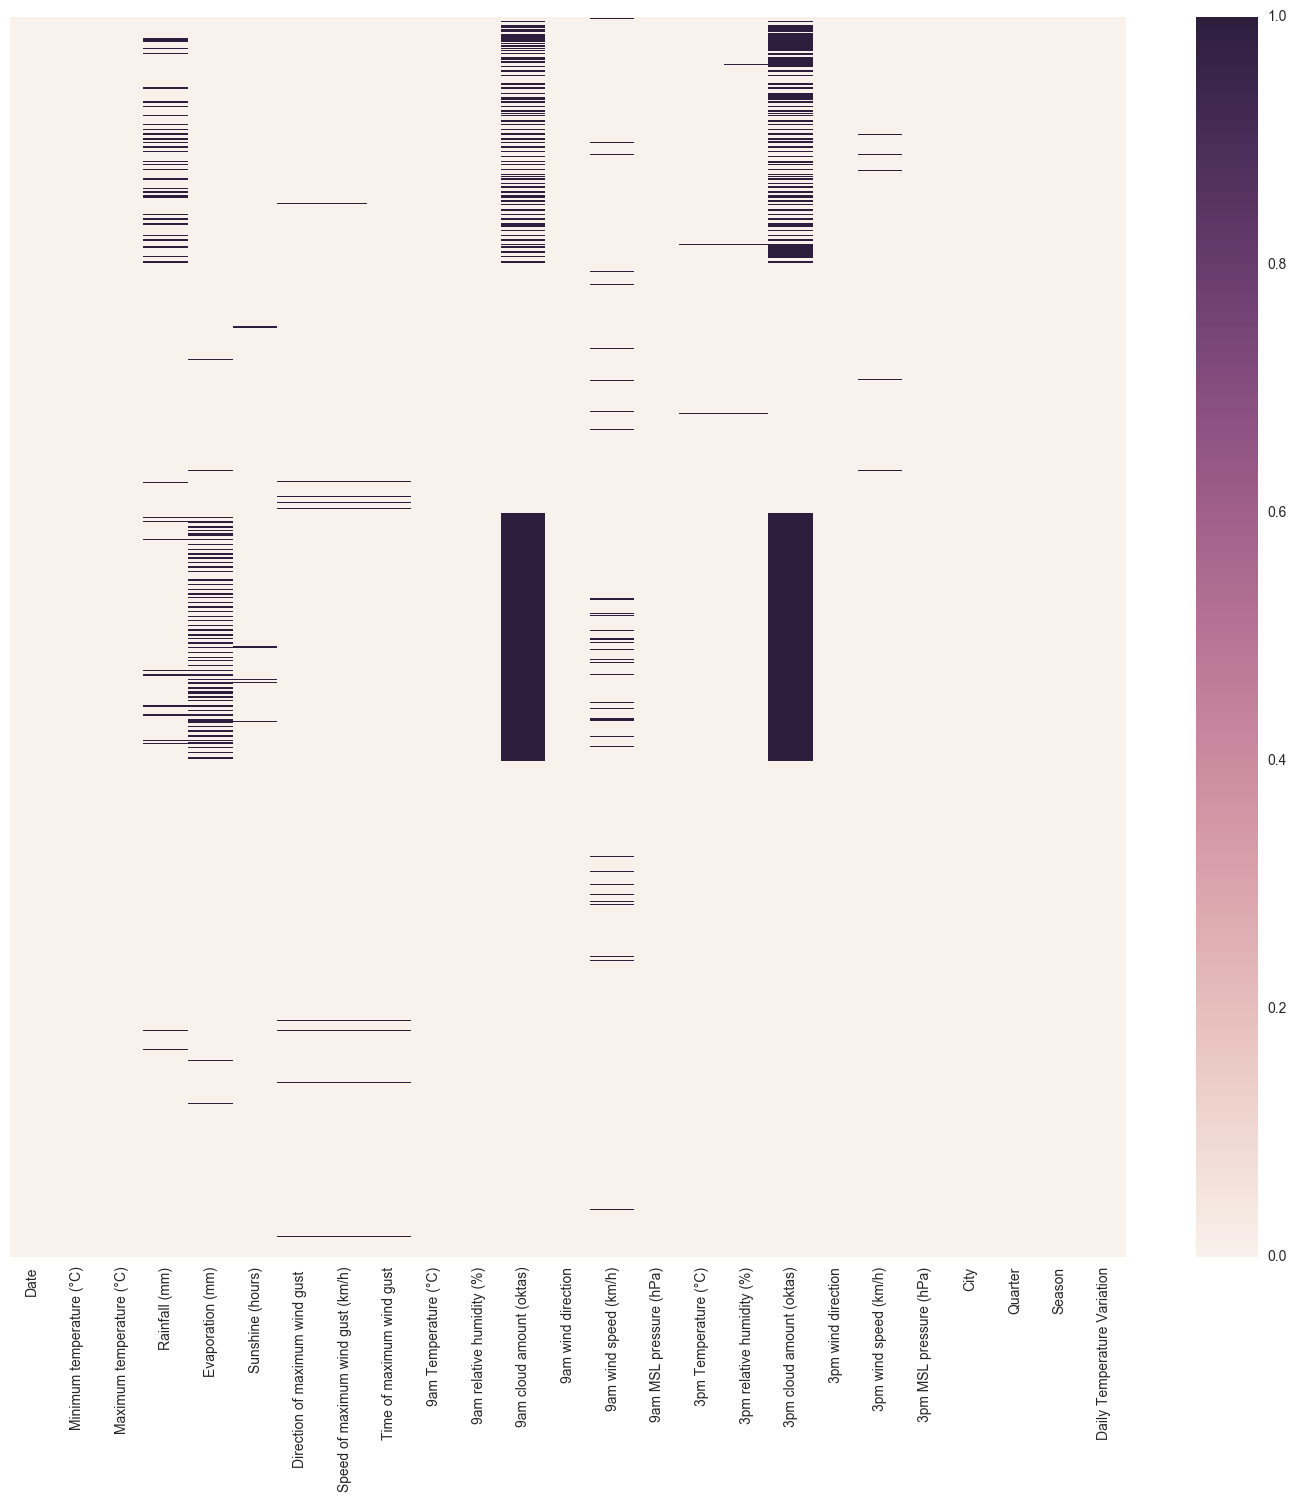

In [379]:
#Plot Nans
f, ax = plt.subplots(1,1,figsize=(1.5*PW,2*PH))
mnn = pd.DataFrame(np.array(df.isnull().values, dtype='bool')+1-1, columns=df.columns)
sns.heatmap(mnn, ax=ax, yticklabels=False);

In [380]:
#Fill Group Median/Mode

# medCols = ["Evaporation (mm)", "Rainfall (mm)", # [Melbourn] [Adelaide] [Melbourn, Adelaide]
#             "3pm cloud amount (oktas)", "9am cloud amount (oktas)"]

medCols = p.index
for col in medCols:
    if df[col].dtype != object:
        df[col] = df[col].fillna(df[col].median())
        df[col] = df.groupby(["City","Quarter"])[col].transform(lambda x: x.fillna(x.median()))
    else:
        #df[col] = df[col].fillna(df[col].mode()[0])
        df[col] = df.groupby(["City","Quarter"])[col].transform(lambda x: x.fillna(lambda y: y.mode()[0]))

In [381]:
#Sort df
df = df.sort_index()

## Rainfall

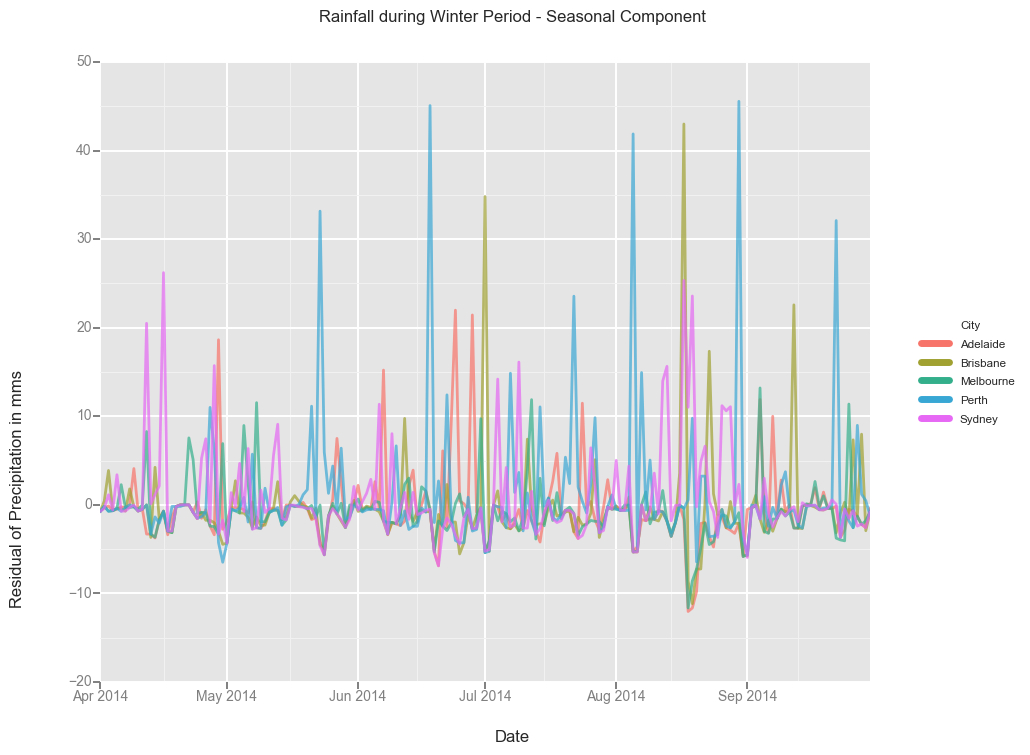

In [382]:
col = u'Rainfall (mm)'
ncol = col + "_MA"
df[ncol] = df[col].rolling(10).mean()
df[ncol] = df[col] - df[ncol]
topl = df[df.Season == "Winter"]
g = ggplot(topl, aes(x='Date', y=ncol, color='City')) + \
        geom_line(size=2.0,alpha=0.7) + \
        xlab('Date') + \
        ylab('Residual of Precipitation in mms') + \
        ggtitle('Rainfall during Winter Period - Seasonal Component')
g
g.save("./Plots/Ranfall1.png")

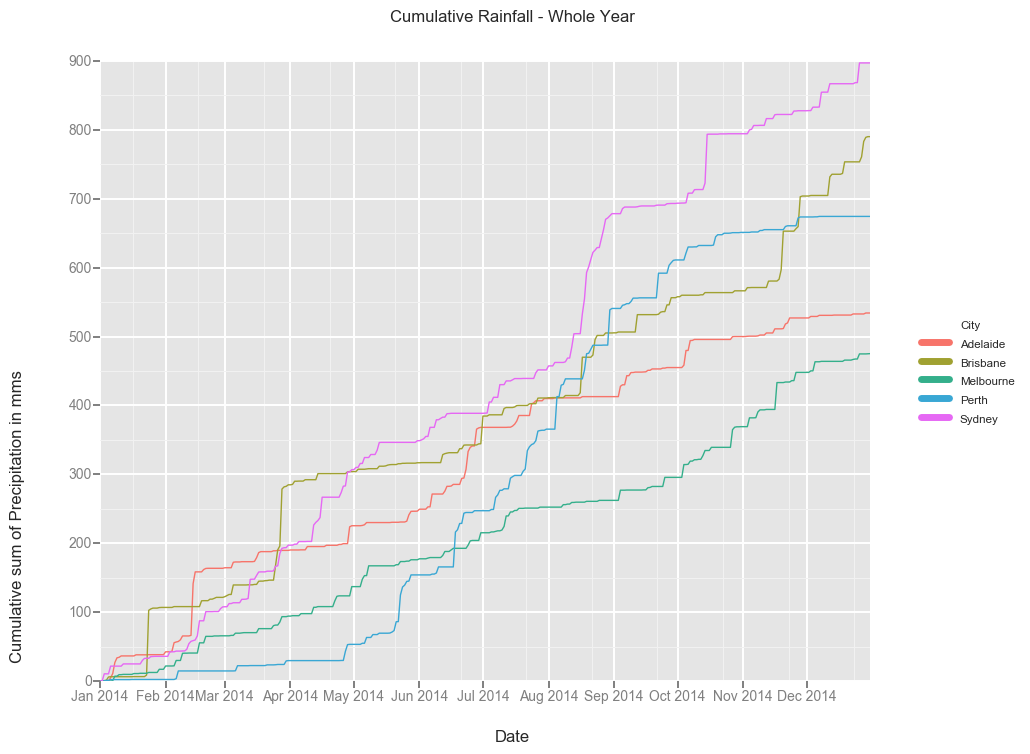

In [383]:
col = u'Rainfall (mm)'
ncol = col + "_CS"
df[ncol] = df.groupby(["City"])[col].transform(lambda x: x.cumsum())
topl = df#[0:len(df):10]
g = ggplot(topl, aes(x="Date", y=ncol, color="City")) + \
    geom_line() +\
    xlab('Date') + \
    ylab('Cumulative sum of Precipitation in mms') + \
    scale_x_date(labels=None) +\
    ggtitle('Cumulative Rainfall - Whole Year')
g
g.save("./Plots/Ranfall2.png")

## Temperature

In [403]:
# col = u"Maximum temperature (°C)"#u'Minimum temperature (°C)'
# ncol = col + "_MA"
# df[ncol] = df[col].rolling(10).mean()
# #df[ncol] = df[col] - df[ncol]
# topl = df#[df.Season == "Winter"]
# g = ggplot(topl, aes(x='Date', y=ncol, color='City')) + \
#         geom_line(size=2.0,alpha=0.7) + \
#         xlab('Date') + \
#         ylab('Residual of Precipitation in mms') + \
#         ggtitle('Rainfall during Winter Period - Seasonal Component')
# g
# g.save("./Plots/Temperature1.png")

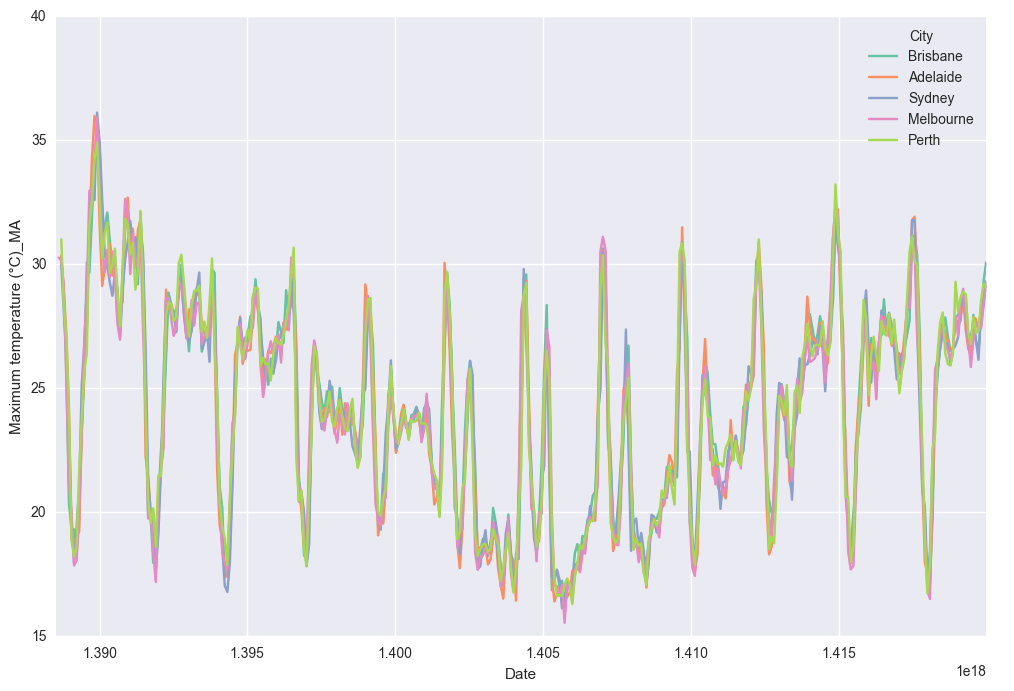

In [402]:
#Seaborn TimeSeries
f, ax = plt.subplots(1,1,figsize=(PW,PH)) 
topl = df.drop("Date",axis=1).reset_index()
topl["Unit"] = 0
sns.tsplot(data=topl, time="Date",condition="City", unit="Unit", value=ncol, ax=ax);